(regmodels)=

# Linear and Generalized Linear Models

Let's simulate some data for illustrations.

In [1]:
import numpy as np
import statsmodels.api as sm

nobs = 200
ncov = 5
np.random.seed(123)
x = np.random.random((nobs, ncov)) # Uniform over [0, 1)
beta = np.repeat(1, ncov)
y = 2 + np.dot(x, beta) + np.random.normal(size = nobs)

In [2]:
y.shape

(200,)

In [3]:
x.shape

(200, 5)

That is, the true linear regression model is
```{math}
y = 2 + x_1 + x_2 + x_3 + x_4 + x_5 + \epsilon.
```

A regression model for the observed data can be fitted as

In [4]:
xmat = sm.add_constant(x)
mymod = sm.OLS(y, xmat)
myfit = mymod.fit()
myfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     17.38
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           3.31e-14
Time:                        01:57:24   Log-Likelihood:                -272.91
No. Observations:                 200   AIC:                             557.8
Df Residuals:                     194   BIC:                             577.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8754      0.282      6.656      0.000       1.320       2.431
x1             1.1703      0.248      4.723      0.000       0.682       1.659
x2             0.8988      0.235      3.825      0.000       0.435       1.362
x3             0.9784      0.238      4.114      0.000       0.509       1.448
x4             1.3418      0.250      5.367      0.000       0.849       1.835
x5             0.6027      0.239      2.519      0.013       0.131       1.075
==============================================================================
Omnibus:                        0.810   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.903
Skew:                          -0.144   Prob(JB):                        0.637
Kurtosis:                       2.839   Cond. No.                         8.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

How are the regression coefficients interpreted? Intercept?

Why does it make sense to center the covariates?

Now we form a data frame with the variables

In [5]:
import pandas as pd
df = np.concatenate((y.reshape((nobs, 1)), x), axis = 1)
df = pd.DataFrame(data = df,
                  columns = ["y"] + ["x" + str(i) for i in range(1,
                  ncov + 1)])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       200 non-null    float64
 1   x1      200 non-null    float64
 2   x2      200 non-null    float64
 3   x3      200 non-null    float64
 4   x4      200 non-null    float64
 5   x5      200 non-null    float64
dtypes: float64(6)
memory usage: 9.5 KB


Let's use a formula to specify the regression model as in R, and fit
a robust linear model (`rlm`) instead of OLS.

In [6]:
import statsmodels.formula.api as smf
mymod = smf.rlm(formula = "y ~ x1 + x2 + x3 + x4 + x5", data = df)
myfit = mymod.fit()
myfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                            RLM   Df Residuals:                      194
Method:                          IRLS   Df Model:                            5
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 29 Mar 2022                                         
Time:                        01:57:24                                         
No. Iterations:                    16                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8353      0.294      6.246      0.000       1.259       2.411
x1             1.1254      0.258      4.355      0.000       0.619       1.632
x2             0.9664      0.245      3.944      0.000       0.486       1.447
x3             0.9995      0.248      4.029      0.000       0.513       1.486
x4             1.3275      0.261      5.091      0.000       0.816       1.839
x5             0.6768      0.250      2.712      0.007       0.188       1.166
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

For model diagnostics, one can check residual plots.

eval_env: 1


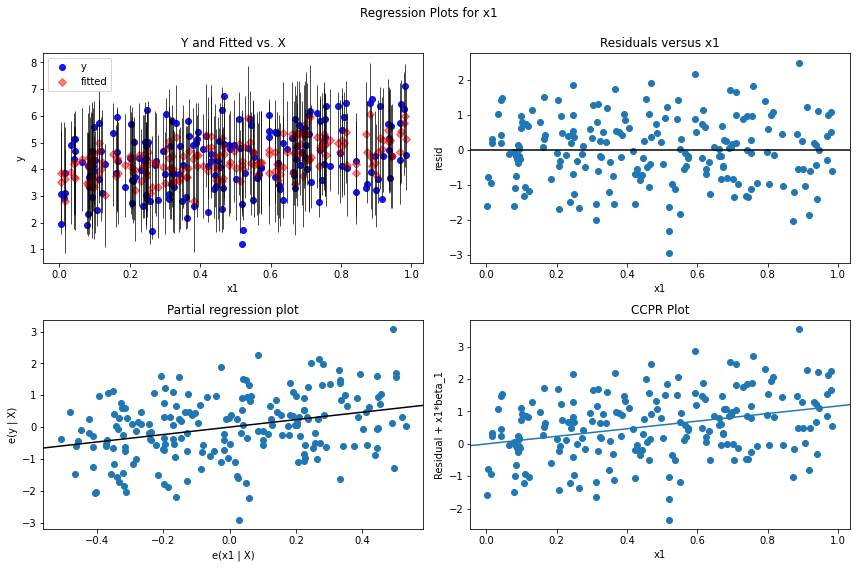

In [7]:
import matplotlib.pyplot as plt

myOlsFit = smf.ols(formula = "y ~ x1 + x2 + x3 + x4 + x5", data = df).fit()
fig = plt.figure(figsize = (12, 8))
## residual versus x1; can do the same for other covariates
fig = sm.graphics.plot_regress_exog(myOlsFit, 'x1', fig=fig)

See more on [residual diagnostics and specification
tests](https://www.statsmodels.org/stable/stats.html#residual-diagnostics-and-specification-tests).


# Generalized Linear Regression

A linear regression model cannot be applied to presence/absence or
count data. 


Binary or count data need to be modeled under a generlized
framework. Consider a binary or count variable $Y$ with possible
covariates $X$.  A generalized model describes a transformation $g$
of the conditional mean $E[Y | X]$ by a linear predictor
$X^{\top}\beta$. That is
\begin{equation*}
g( E[Y | X] ) = X^{\top} \beta.
\end{equation*}
The transformation $g$ is known as the link function.


For logistic regression with binary outcomes, the link function is
the logit function
\begin{equation*}
g(u) = \log \frac{u}{1 - u}, \quad u \in (0, 1).
\end{equation*}

What is the interpretation of the regression coefficients in a
logistic regression? Intercept?

A logistic regression can be fit with `statsmodels.api.glm`.

Let's generate some binary data first by dichotomizing existing variables.

In [8]:
df['yb' ] = np.where(df['y' ] > 2.5, 1, 0)
df['x1b'] = np.where(df['x1'] > 0.5, 1, 0)

Fit a logistic regression for `y1b`.

In [9]:
mylogistic = smf.glm(formula = 'yb ~ x1b + x2 + x3 + x4 + x5', data = df,
                     family = sm.families.Binomial())
mylfit = mylogistic.fit()
mylfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     yb   No. Observations:                  200
Model:                            GLM   Df Residuals:                      194
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30.654
Date:                Tue, 29 Mar 2022   Deviance:                       61.307
Time:                        01:57:26   Pearson chi2:                     217.
No. Iterations:                     7   Pseudo R-squ. (CS):            0.05871
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4354      1.309     -0.333      0.739      -3.002       2.131
x1b            1.2721      0.845      1.505      0.132      -0.384       2.928
x2             2.6897      1.418      1.897      0.058      -0.089       5.469
x3            -0.0537      1.270     -0.042      0.966      -2.542       2.435
x4             2.6576      1.438      1.848      0.065      -0.160       5.476
x5             1.8752      1.330      1.409      0.159      -0.732       4.483
==============================================================================
"""

If we treat `y1b` as count data, a Poisson regression can be fitted.

In [10]:
myPois = smf.glm(formula = 'yb ~ x1b + x2 + x3 + x4 + x5', data = df,
                 family = sm.families.Poisson())
mypfit = myPois.fit()
mypfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     yb   No. Observations:                  200
Model:                            GLM   Df Residuals:                      194
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -199.55
Date:                Tue, 29 Mar 2022   Deviance:                       17.091
Time:                        01:57:26   Pearson chi2:                     8.99
No. Iterations:                     4   Pseudo R-squ. (CS):           0.002487
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2045      0.288     -0.710      0.477      -0.769       0.360
x1b            0.0445      0.146      0.304      0.761      -0.242       0.331
x2             0.0965      0.249      0.387      0.699      -0.392       0.585
x3            -0.0088      0.254     -0.035      0.972      -0.507       0.490
x4             0.1072      0.267      0.402      0.688      -0.416       0.630
x5             0.0750      0.253      0.296      0.767      -0.421       0.571
==============================================================================
"""